[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 36** | Semantix 

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 23 de maio de 2025.

---

## Classificação de Câncer Usando Medidas de Expressão Gênica


### Introdução

O diagnóstico preciso do tipo de câncer é fundamental para a seleção de tratamentos eficazes e melhoria dos resultados para os pacientes. Recentemente, as técnicas de aprendizado de máquina têm emergido como ferramentas poderosas para auxiliar na classificação e previsão de doenças com base em dados genômicos. Este projeto explora a aplicação de modelos de regressão logística e linear, bem como a Análise de Componentes Principais (PCA), para classificar duas formas relacionadas de leucemia: Leucemia Linfoblástica Aguda (LLA) e Leucemia Mieloide Aguda (LMA), usando dados de expressão gênica.

### Objetivo

O objetivo deste projeto é construir e comparar modelos de classificação para distinguir entre LLA e LMA com base em medidas de expressão gênica de 7129 genes. Nós exploramos a utilização de regressão linear e logística, regressão logística múltipla e PCA para redução de dimensionalidade, visando entender como cada gene contribui para a classificação e como a redução de dimensionalidade pode impactar a performance dos modelos.

### Metodologia

- Exploração e Normalização dos Dados: Começamos com a exploração dos dados de expressão gênica para entender sua distribuição e escala. Normalizamos os dados para contabilizar diferenças de escala entre os genes.


- Análise de Componentes Principais (PCA): Reduzimos a dimensionalidade do conjunto de dados para identificar os principais componentes que capturam a maior parte da variância nos dados, facilitando a visualização e a modelagem subsequente.


- Regressão Linear e Logística: Construímos modelos de regressão linear e logística usando um único gene preditor e comparamos sua eficácia na classificação das duas formas de câncer. Também exploramos o uso de regressão logística múltipla com todos os genes como preditores.


- PCR: Regressão dos Componentes Principais: Implementamos a Regressão dos Componentes Principais (PCR) ajustando modelos de regressão logística nos componentes principais para explorar como a redução da dimensionalidade afeta a precisão da classificação.


- Avaliação de Modelos: Comparamos a precisão da classificação, a interpretabilidade e a capacidade de generalização dos diferentes modelos para determinar as abordagens mais eficazes

### Importância

Este projeto ilustra o potencial das técnicas de aprendizado de máquina e redução de dimensionalidade na classificação de tipos de câncer, um passo crucial para a personalização da medicina. Ao entender as diferenças e semelhanças entre modelos e a influência da dimensionalidade, podemos aproximar a ciência de dados e a genética para oferecer insights valiosos na luta contra o câncer.

#### Bibliotecas:

1. **warnings:** Utilizada para suprimir avisos que podem surgir durante a execução do código, como avisos de depreciação, garantindo uma saída mais limpa.

2. **NumPy (np):** Essencial para manipulação numérica em Python. Pode ser usada para realizar operações matemáticas complexas em arrays e matrizes, fundamentais na manipulação de dados de expressão gênica.

3. **Pandas (pd):** Facilita a manipulação e análise de dados. Será usada para carregar, explorar e preparar o conjunto de dados de expressão gênica para modelagem.

4. **statsmodels (sm) e OLS:** Oferecem modelos estatísticos robustos e testes estatísticos. OLS (Ordinary Least Squares) pode ser usado para regressão linear, útil na análise inicial de relações entre genes e tipos de câncer.

5. **Scikit-learn (sklearn):** Esta biblioteca de aprendizado de máquina é fundamental para o projeto. Será usada para:
   - **PCA:** Reduzir a dimensionalidade dos dados de expressão gênica.
   - **LogisticRegression e LogisticRegressionCV:** Ajustar modelos de regressão logística e realizar validação cruzada para otimizar hiperparâmetros.
   - **LinearDiscriminantAnalysis (LDA) e QuadraticDiscriminantAnalysis (QDA):** Testar métodos de análise discriminante linear e quadrática.
   - **PolynomialFeatures:** Criar recursos polinomiais para modelos complexos.
   - **KNeighborsClassifier:** Implementar classificação baseada em vizinhos mais próximos.
   - **cross_val_score, KFold:** Ferramentas para validação cruzada, essenciais para avaliar a performance dos modelos.
   - **accuracy_score:** Calcular a precisão dos modelos de classificação.
   - **MinMaxScaler:** Normalizar os dados de expressão gênica, garantindo que todos os recursos estejam na mesma escala.
   

6. **Math e scipy.special.gamma:** Utilizadas para operações matemáticas e funções especiais necessárias para análises estatísticas detalhadas ou específicas.

7. **Matplotlib (plt) e seaborn (sns):** Bibliotecas de visualização de dados poderosas para criar gráficos e visualizações que facilitam a interpretação dos resultados das análises.

8. **IPython.display.display:** Usado para exibir outputs de forma mais interativa e flexível no Jupyter Notebook.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import math
from scipy.special import gamma

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import display


**Classificação de Tipos de Câncer através da Análise de Expressão Gênica**

Neste estudo, empenhamo-nos na elaboração de um sofisticado modelo de classificação com o propósito de discernir entre duas categorias intimamente ligadas de câncer: Leucemia Linfoblástica Aguda (LLA) e Leucemia Mieloide Aguda (LMA), empregando dados de expressão gênica. O conjunto de dados analisado, alojado no arquivo `dados.csv`, consiste em amostras de tecido tumoral oriundas de pacientes acometidos por uma das mencionadas variantes de leucemia. A disposição dos dados revela, na primeira coluna, o tipo de câncer identificado, com o numeral 0 representando a classe LLA e o numeral 1, a classe LMA. As colunas subsequentes, da 2 à 7130, documentam os níveis de expressão de 7129 genes distintos, registrados em cada amostra.

À medida que avançamos, adotaremos metodologias de regressão linear e logística na configuração de modelos de classificação dedicados a este conjunto de dados. Adicionalmente, recorreremos à Análise de Componentes Principais (PCA) com o objetivo de simplificar a dimensionalidade dos dados em questão, facilitando assim a interpretação e melhorando a eficiência dos modelos propostos.

## Parte 1: Exploração dos Dados

O ponto de partida deste estudo envolve a segmentação das observações em um conjunto de treinamento e um conjunto de teste, buscando alcançar uma proporção aproximada de 50% para cada um. Esta divisão equitativa é crucial para garantir que tenhamos uma quantidade representativa de dados para treinar nosso modelo, bem como um conjunto independente para avaliar sua performance de maneira objetiva.

In [3]:
# Definir a semente do gerador de números aleatórios para garantir reprodutibilidade
np.random.seed(9002)

# Carregar os dados de expressão gênica do arquivo 'dados.csv' para um DataFrame
df = pd.read_csv('C:\\Users\\User\\Desktop\\Anaconda Projects\\Projeto Semantix\\dados.csv')

# Gerar uma máscara booleana com a mesma quantidade de linhas do DataFrame.
# Cada elemento é True se um valor aleatório gerado for menor que 0.5, caso contrário, False.
# Isso é usado para dividir os dados em conjuntos de treinamento e teste de forma aleatória.
msk = np.random.rand(len(df)) < 0.5

# Selecionar as linhas para o conjunto de treinamento usando a máscara booleana.
# As linhas correspondentes aos valores True na máscara são incluídas no conjunto de treinamento.
data_train = df[msk]

# Selecionar as linhas para o conjunto de teste invertendo a máscara booleana.
# As linhas correspondentes aos valores False na máscara original são incluídas no conjunto de teste.
data_test = df[~msk]


In [4]:
display(df.head(10))

,Cancer_type,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
1,0,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
2,0,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
3,0,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42
4,0,-413,-260,7,-2,-541,-790,-275,-463,70,...,289,629,-86,302,23,1798,446,59,781,20
5,0,-67,-93,84,25,-179,-323,-135,-127,-2,...,48,224,60,194,-10,291,41,8,-2,-80
6,0,-92,-119,-31,173,-233,-227,-49,-62,13,...,213,583,3,530,-39,696,302,24,74,-11
7,0,-107,-72,-126,149,-205,-284,-166,-185,1,...,120,722,20,332,-5,195,59,31,116,-18
8,0,-117,-219,-50,257,-218,-402,228,-147,65,...,79,631,-26,455,-62,736,445,42,247,-43
9,0,-476,-213,-18,301,-403,-394,-42,-144,98,...,241,1214,127,255,50,1701,1108,61,525,-83


**1.1 Análise Inicial do Conjunto de Treinamento:** 

Ao examinarmos o conjunto de treinamento, é crucial observarmos as significativas variações nas medidas de expressão gênica entre diferentes genes. Essas medidas variam amplamente, com alguns valores sendo negativos, outros aproximando-se de zero, e ainda outros alcançando magnitudes na ordem dos milhares. Essa diversidade de escalas e variabilidades entre os preditores pode impactar negativamente a eficácia dos modelos de aprendizado de máquina. Portanto, é essencial normalizar cada preditor para que varie uniformemente entre 0 e 1, garantindo assim que todos eles contribuam equitativamente para o processo de aprendizado e melhorem a precisão do modelo de classificação desenvolvido.

In [5]:
def normalize_columns(df, cols, scaler):
    df_copy = df.copy()
    df_copy[cols] = scaler.transform(df[cols])
    return df_copy

> A função `normalize_columns` normaliza colunas selecionadas de um DataFrame usando um escalonador pré-definido. Ela faz uma cópia do DataFrame original para evitar alterações nos dados originais, aplica a transformação de normalização apenas nas colunas especificadas, e retorna o DataFrame modificado. Isso permite a normalização precisa de características específicas, mantendo o restante dos dados intactos, essencial para a preparação eficaz dos dados para modelagem.

In [6]:
response_col = 'Cancer_type'
predictors = data_train.columns.difference([response_col])
scaler = MinMaxScaler().fit(data_train[predictors])
data_train_scaled = normalize_columns(data_train, predictors, scaler)
data_test_scaled = normalize_columns(data_test, predictors, scaler)

> Este código prepara os conjuntos de treinamento e teste para modelagem, escalonando os preditores para o intervalo [0, 1]. Primeiro, define-se a coluna de resposta (`'Cancer_type'`) e identificam-se os preditores excluindo essa coluna do conjunto de treinamento. Em seguida, instancia-se o `MinMaxScaler` e ajusta-se aos preditores do conjunto de treinamento. A função `normalize_columns` é então aplicada aos conjuntos de treinamento e teste para escalar as colunas dos preditores. O resultado são conjuntos de dados escalonados (`data_train_scaled` e `data_test_scaled`) prontos para a análise subsequente.

In [7]:
# separate into predictors and response
## train
y_train = data_train_scaled[response_col]
X_train_scaled = data_train_scaled[predictors]
## test
y_test = data_test_scaled[response_col]
X_test_scaled = data_test_scaled[predictors]

> Este bloco de código segmenta os conjuntos de dados escalonados de treinamento e teste em componentes de preditores e resposta. Para o conjunto de treinamento, `y_train` contém os valores da coluna de resposta, enquanto `X_train_scaled` inclui as colunas dos preditores já escalonados. O mesmo processo é aplicado ao conjunto de teste, gerando `y_test` para a resposta e `X_test_scaled` para os preditores escalonados. Este passo prepara os dados para a modelagem, organizando-os de forma adequada para análises subsequentes.

In [8]:
# verify transformation
X_train_scaled.describe()

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000381_s_at,AB000409_at,AB000410_s_at,AB000449_at,AB000450_at,AB000460_at,...,Z84721_cds2_at,Z84722_at,Z86000_at,Z93784_at,Z94753_s_at,Z95624_at,Z96810_at,Z97054_xpt2_at,Z97074_at,hum_alu_at
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.225047,0.379253,0.133660,0.377114,0.614879,0.338714,0.642135,0.232975,0.338544,0.366077,...,0.301265,0.724295,0.307447,0.283810,0.390125,0.375121,0.411335,0.397629,0.408433,0.387442
std,0.184174,0.239350,0.217092,0.198466,0.210569,0.187751,0.260907,0.215510,0.233942,0.211425,...,0.222715,0.160970,0.206939,0.199026,0.215197,0.214607,0.234657,0.236164,0.218074,0.246407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.089725,0.235477,0.026899,0.272388,0.482794,0.238484,0.515249,0.089877,0.176699,0.245512,...,0.124274,0.676128,0.190579,0.166584,0.246865,0.211353,0.260593,0.236676,0.245719,0.207247
50%,0.193655,0.356846,0.056630,0.353234,0.617409,0.304439,0.681380,0.182209,0.317476,0.353501,...,0.255927,0.750353,0.273651,0.213722,0.332288,0.335749,0.389831,0.352755,0.422945,0.333076
75%,0.313684,0.508299,0.098749,0.404229,0.736842,0.402010,0.857143,0.301227,0.407282,0.438241,...,0.403569,0.801128,0.390149,0.316881,0.464734,0.555556,0.550847,0.509711,0.525257,0.609126
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Este código realiza uma verificação da transformação aplicada aos preditores do conjunto de treinamento escalonado. Utilizando o método `.describe()`, ele gera um resumo estatístico das colunas dos preditores em `X_train_scaled`, incluindo medidas como média, desvio padrão, valor mínimo, quartis e valor máximo. Este passo é crucial para assegurar que a normalização foi executada corretamente e para entender a nova escala dos dados.

A variabilidade nos níveis de expressão gênica era inicialmente bastante significativa, apresentando uma ampla gama de variações entre os diferentes genes. Contudo, com a aplicação do escalonamento, essa questão de grande variância foi efetivamente mitigada, resultando em uma uniformidade consideravelmente melhorada nos dados.

**1.2 Desafios em Modelagem com Mais Preditores que Observações**

Ao analisar o conjunto de treinamento, notamos uma característica desafiadora: o número de preditores supera o de observações. Esse cenário implica potenciais dificuldades ao tentar ajustar um modelo de classificação, pois a alta dimensionalidade em relação ao número de amostras pode levar a problemas de sobreajuste, tornando o modelo excessivamente complexo e possivelmente incapaz de generalizar bem para dados novos ou não vistos. Este desequilíbrio entre preditores e observações é uma questão crítica que demanda atenção cuidadosa no processo de modelagem.

In [9]:
X_train_scaled.head()

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000381_s_at,AB000409_at,AB000410_s_at,AB000449_at,AB000450_at,AB000460_at,...,Z84721_cds2_at,Z84722_at,Z86000_at,Z93784_at,Z94753_s_at,Z95624_at,Z96810_at,Z97054_xpt2_at,Z97074_at,hum_alu_at
0,0.095644,0.531120,0.097688,0.348259,0.554656,0.041876,0.524880,0.047853,0.357282,0.309515,...,0.197924,0.803244,0.223612,0.426456,0.592476,0.463768,0.000000,0.272809,0.547945,0.166547
2,0.064394,0.298755,0.058046,0.363184,0.639676,0.490787,0.857143,0.359509,0.357282,0.295512,...,0.076476,0.747532,0.104769,0.475814,0.451411,0.222222,0.326271,0.317977,0.407534,0.225260
5,0.292614,0.282158,0.052383,0.343284,0.404858,0.401173,0.455859,0.171779,0.100971,0.234470,...,0.125161,0.769394,0.107115,0.176703,0.253918,0.178744,0.182203,0.199639,0.476027,0.398496
9,0.053977,0.634855,0.051439,0.233831,0.951417,0.396985,0.060995,0.426994,0.943689,0.856373,...,0.266351,1.000000,0.886630,0.656466,0.927900,0.314010,0.266949,0.702800,0.453767,0.145881
10,0.033144,0.435685,0.058046,0.233831,0.761134,0.317420,0.897271,0.180368,0.318447,0.180610,...,0.000000,0.700282,0.117279,0.120434,0.376176,0.062802,0.656780,0.412827,0.248288,0.329248


> Este comando renderiza uma tabela com as primeiras cinco linhas do DataFrame X_train_scaled, permitindo verificar a aplicação bem-sucedida do escalonamento aos preditores. Se desejar visualizar um número diferente de linhas, você pode passar esse número como argumento para o método .head(). Por exemplo, X_train_scaled.head(10) exibirá as primeiras 10 linhas.

A presença de um número elevado de preditores, neste caso, 7.130, em comparação com um número relativamente baixo de amostras, apenas 40, introduz complicações significativas no desenvolvimento de modelos de classificação eficazes, destacando-se principalmente três desafios:

1. **Invertibilidade das Matrizes Comprometida:** Quando o número de preditores excede o de observações, as matrizes envolvidas nas análises estatísticas frequentemente se tornam singulares ou próximas de singulares, o que impede a sua inversão. Isso é crucial para vários métodos de modelagem que dependem da inversão matricial.

2. **Risco Acentuado de Multicolinearidade:** Uma quantidade excessiva de preditores aumenta a probabilidade de que alguns deles sejam altamente correlacionados entre si. Isso pode distorcer a interpretação dos coeficientes do modelo e inflar a variância das estimativas, comprometendo a confiabilidade dos resultados.

3. **Perigo de Overfitting:** Com muitos preditores, o modelo pode se ajustar demais aos dados de treinamento, capturando ruídos em vez de padrões genuínos. Isso deteriora a capacidade do modelo de generalizar para novos conjuntos de dados, limitando sua utilidade prática.

Dado esse cenário, estratégias como a regularização, que penaliza modelos excessivamente complexos, e a Análise de Componentes Principais (PCA), que reduz a dimensionalidade dos dados, emergem como abordagens necessárias. Elas visam mitigar os riscos associados ao elevado número de preditores, promovendo a construção de modelos mais robustos e identificáveis.

**1.3 Análise Discriminativa de Genes entre Tipos de Câncer**

Neste segmento, direcionaremos nossa atenção à capacidade discriminativa de certos genes na distinção entre tipos de câncer. Propomos a elaboração de uma visualização composta por quatro subgráficos, organizados numa configuração de grade 2x2, cada um dedicado a um gene específico: `D29963_at`, `M23161_at`, `hum_alu_at` e `AFFX-PheX-5_at`. Em cada subgráfico, superporemos dois histogramas que representam os níveis de expressão gênica, com um histograma por tipo de câncer, facilitando uma comparação visual direta.

A eficácia de cada gene em discriminar entre as classes de câncer será avaliada pela distinção visual entre os histogramas correspondentes a cada tipo. Uma separação clara entre os histogramas de diferentes classes sugere que o gene possui uma forte capacidade discriminatória. Esta análise nos permite identificar genes que podem ser particularmente informativos para a classificação do tipo de câncer, contribuindo para aprimorar a precisão dos modelos de classificação.

In [10]:
def plot_genes_histograms(genes_list, df):
    count = len(genes_list)
    if (count % 2 != 0) | (count<2):
        return
    genes_arr = np.array(genes_list).reshape(-1, 2)
    fig, ax = plt.subplots(count//2, 2, figsize=(18, 4*count//2))
    for (i,j), gene in np.ndenumerate(genes_arr):
        sns.distplot(df[df['Cancer_type'] == 0][gene],
                     label='Acute Lymphoblastic Leukemia (ALL)', ax=ax[i][j])
        sns.distplot(df[df['Cancer_type'] == 1][gene],
                     label='Acute Myeloid Leukemia (AML)', ax=ax[i][j])
        ax[i][j].set_title(gene)
        ax[i][j].legend()
        ax[i][j].set_xlabel('')
        ax[i][j].set_ylabel('frequency')
    ax[i][j].set_xlabel('expression level')
    ax[i][j-1].set_xlabel('expression level')
        

> A função `plot_genes_histograms` visualiza a distribuição dos níveis de expressão gênica, diferenciando entre Leucemia Linfoblástica Aguda (ALL) e Leucemia Mieloide Aguda (AML). Para cada gene especificado, a função plota dois histogramas no mesmo subgráfico: um para ALL e outro para AML, facilitando a comparação visual. Os gráficos são organizados numa grade, com os títulos dos subgráficos correspondendo aos nomes dos genes e legendas indicando os tipos de câncer. Ajustes finais nos eixos garantem clareza na apresentação dos níveis de expressão ("expression level") e frequência ("frequency").

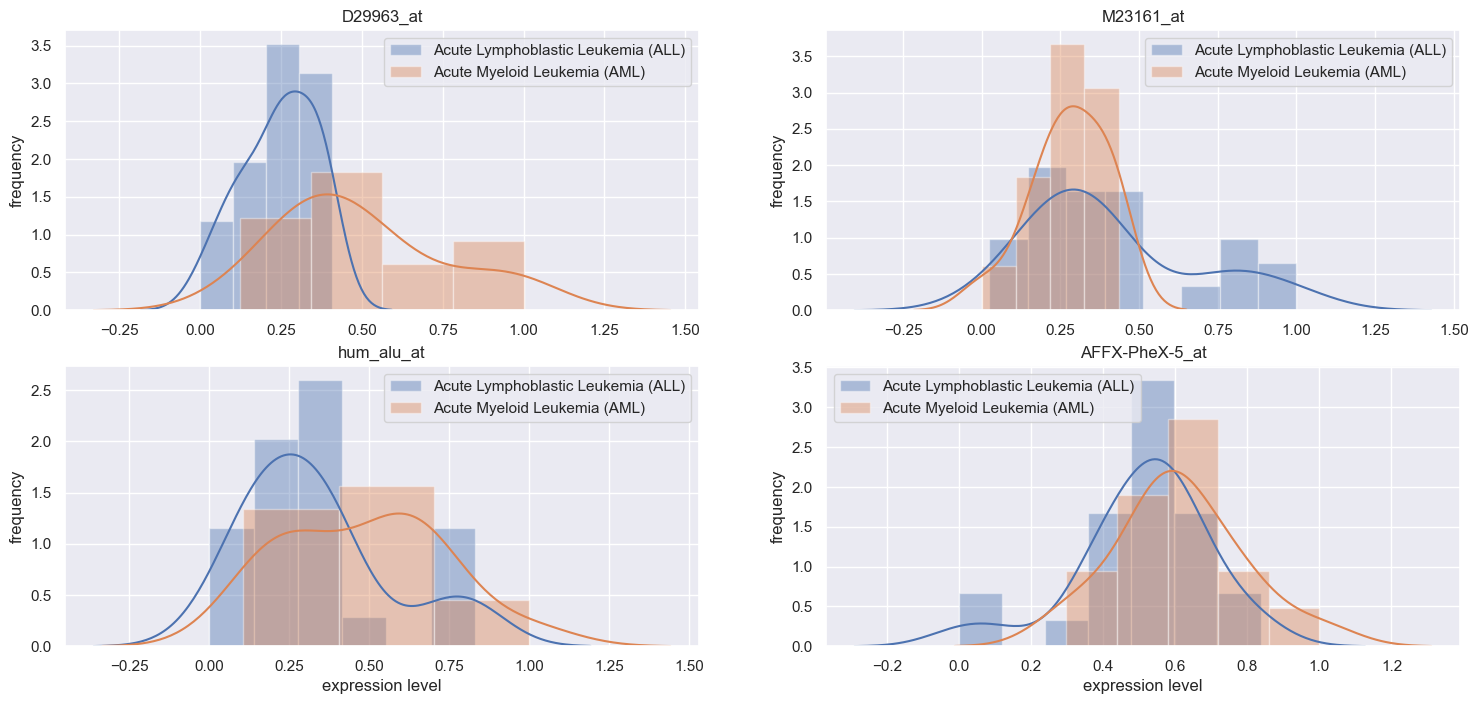

In [11]:
genes_list = ['D29963_at', 'M23161_at', 'hum_alu_at', 'AFFX-PheX-5_at']
plot_genes_histograms(genes_list, data_train_scaled)

> A análise dos histogramas sobrepostos revela as distribuições de expressão gênica para cada gene analisado. A distinção entre as classes de câncer LLA e LMA é possível quando suas respectivas funções de densidade de probabilidade (PDFs) não se sobrepõem significativamente. No entanto, observamos uma considerável sobreposição nas PDFs para os quatro genes examinados, indicando que nenhum deles oferece uma discriminação clara entre LLA e LMA por si só. Apesar disso, é possível inferir tendências específicas: expressões diminuídas de `D29963_at` e `hum_alu_at`, assim como expressões extremamente elevadas de `M23161_at` e valores muito reduzidos de `AFFX-PheX-5_at`, tendem a estar associadas a uma probabilidade maior de diagnóstico de LLA. Por outro lado, altos níveis de expressão de `D29963_at` sugerem uma maior inclinação para o diagnóstico de LMA. Essas observações sublinham a complexidade inerente à correlação entre a expressão gênica e os tipos específicos de câncer, enfatizando a necessidade de uma análise mais aprofundada e integrada para aprimorar a precisão diagnóstica.

**1.4 Redução de Dimensionalidade para Visualização com PCA**

Dada a elevada dimensionalidade do nosso conjunto de dados de expressão gênica, que dificulta a visualização e interpretação diretas, adotamos a Análise de Componentes Principais (PCA) para simplificar essa complexidade. A PCA nos permite identificar e extrair os dois principais componentes que capturam a maior parte da variação nos dados. Com esses componentes, criamos um gráfico de dispersão que facilita a visualização das diferenças entre os dois tipos de câncer, usando cores e marcadores distintos para cada classe (por exemplo, 'x' para um e 'o' para o outro).

Este gráfico nos permite avaliar visualmente até que ponto os dois principais componentes conseguem discriminar entre as classes de câncer. Além disso, essa análise nos informa sobre a porcentagem da variação total nos dados de expressão gênica que esses componentes conseguem explicar, oferecendo insights sobre a eficácia da PCA na redução de dimensionalidade e na preservação de informações críticas do conjunto original de dados.

In [12]:
pca_transformer = PCA(2).fit(X_train_scaled)
X_train_2d = pca_transformer.transform(X_train_scaled)
var_explained = pca_transformer.explained_variance_ratio_

> Este código inicializa e ajusta um transformador PCA para reduzir a dimensionalidade dos dados de treinamento escalonados para dois componentes principais. `X_train_2d` contém a representação de `X_train_scaled` nesse espaço reduzido. `var_explained` armazena a proporção da variação total explicada por esses dois componentes.

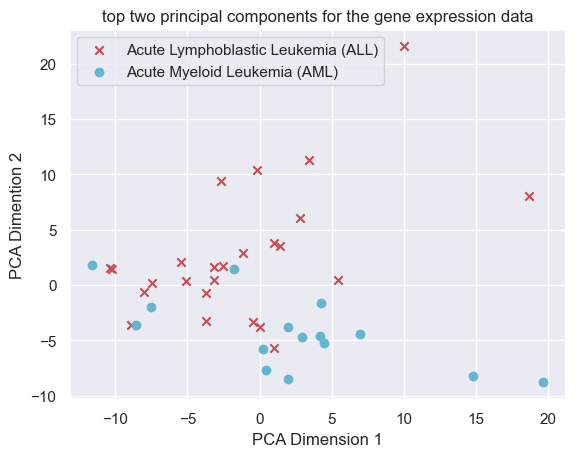

In [13]:
colors = ['r','c']
label_text = ["Acute Lymphoblastic Leukemia (ALL)", "Acute Myeloid Leukemia (AML)"]

markshapes = ['x','o']
# and we loop over the different groups
for cancer_type in [0,1]:
    df_per_type = X_train_2d[y_train==cancer_type]
    plt.scatter(df_per_type[:,0], df_per_type[:,1],
                marker=markshapes[cancer_type],
                c = colors[cancer_type],
                label=label_text[cancer_type])
    
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")
plt.title("top two principal components for the gene expression data")
plt.legend();

> Temos agora um gráfico de dispersão utilizando os dois principais componentes da PCA para distinguir visualmente entre as classes de câncer LLA (Leucemia Linfoblástica Aguda) e LMA (Leucemia Mieloide Aguda), utilizando cores e marcadores específicos para cada classe. Os dados de cada tipo de câncer são plotados com uma cor e forma de marcador designadas, permitindo uma clara visualização da distribuição e possível separação das classes no espaço bidimensional resultante da PCA. O gráfico é devidamente rotulado, incluindo uma legenda que facilita a identificação das classes. A partir deste gráfico, podemos observar a eficácia da PCA em revelar agrupamentos ou padrões distintos, contribuindo para a compreensão de como os tipos de câncer podem ser diferenciados com base nos padrões de expressão gênica.

A discriminação entre as condições de LLA (Leucemia Linfoblástica Aguda) e LMA (Leucemia Mieloide Aguda) pelos dois principais componentes derivados da PCA mostra limitações. Observa-se que ambos os tipos de câncer apresentam sobreposições significativas nos valores mais baixos (<4) da segunda dimensão do PCA, indicando uma dificuldade em distinguir entre LLA e LMA com base nestes valores. Entretanto, valores mais elevados (>4) na segunda dimensão tendem a indicar LLA com maior clareza. Além disso, uma combinação específica de valores — primeira dimensão superior a 3 e segunda dimensão inferior a zero — sugere uma metodologia potencial para a identificação precisa de casos de LMA. Essas observações ressaltam a complexidade inerente à classificação de tipos de câncer com base em expressões gênica e sugerem caminhos para refinamento futuro dos modelos de predição.

In [14]:
print("Variance explained by each PCA component:", var_explained)
print("Total Variance Explained:", np.sum(var_explained))

Variance explained by each PCA component: [0.15889035 0.11428795]
Total Variance Explained: 0.27317829452088654


> A análise de componentes principais (PCA) revelou que o primeiro componente principal é responsável por explicar 15,88% da variabilidade presente nos dados, enquanto o segundo componente contribui com uma explicação adicional de 11,43%. Combinados, esses dois componentes principais elucidam aproximadamente 27,31% da variância total observada no conjunto de dados de treinamento. Esta constatação sugere que, para capturar uma porção maior da complexidade e variabilidade dos dados, pode ser necessário incorporar dimensões adicionais proporcionadas pela PCA.

**1.5 Análise da Variação Cumulativa Explicada por Componentes PCA**

Para entender melhor a distribuição da variabilidade nos nossos dados de expressão gênica, realizamos uma análise da variação cumulativa explicada, avaliando até os primeiros 40 componentes principais identificados pela PCA. Esta análise visa determinar o número ótimo de componentes que são necessários para capturar uma porção significativa da variabilidade total nos dados, especificamente buscando explicar pelo menos 90% da mesma.

Embora inicialmente possamos considerar que apenas 2 componentes principais sejam suficientes para a análise, a investigação detalhada da variação cumulativa nos permitirá identificar o número exato de componentes necessários para alcançar um limiar de explicação de 90% da variabilidade. Este passo é crucial para otimizar a dimensionalidade do modelo, equilibrando entre a simplicidade e a capacidade de captura da complexidade inerente ao conjunto de dados.

In [15]:
pca_transformer = PCA(40).fit(X_train_scaled)
X_train_40d = pca_transformer.transform(X_train_scaled)
var_explained_40d = pca_transformer.explained_variance_ratio_

> Aqui é inicializado um transformador PCA sendo configurado para extrair até 40 componentes principais dos dados de treinamento escalonados. Primeiro, o PCA é ajustado aos dados (`X_train_scaled`), e então os dados são transformados, resultando em uma representação reduzida (`X_train_40d`) com 40 dimensões. Finalmente, `var_explained_40d` armazena a porção da variância explicada por cada um dos 40 componentes principais.

In [16]:
var_explained_cum = np.cumsum(var_explained_40d)

# display as a table
var_explained_df = pd.DataFrame()
var_explained_df['dimensions'] = np.array(list(range(1,len(var_explained_cum)+1)))
var_explained_df['cumulative_var_explained'] = var_explained_cum
display(var_explained_df)

,dimensions,cumulative_var_explained
0,1,0.158890
1,2,0.273178
2,3,0.339141
3,4,0.387015
4,5,0.429572
5,6,0.467894
6,7,0.500530
7,8,0.529504
8,9,0.556197
9,10,0.580748


> Acima foi calculada a variância explicada cumulativa dos 40 componentes principais da PCA, então é armazenada a soma cumulativa da variância explicada em `var_explained_cum`, indicando quanto da variação total é capturada à medida que incluímos mais componentes. A tabela criada lista o número de dimensões (componentes) e a variância explicada cumulativa correspondente, facilitando a visualização do impacto incremental de adicionar cada componente adicional.

Agora serão geradas duas visualizações gráficas relacionadas à Análise de Componentes Principais (PCA) de um conjunto de dados. O primeiro gráfico exibirá a variância explicada cumulativa pelos primeiros 40 componentes da PCA, facilitando a identificação do número de dimensões necessárias para capturar uma porção significativa da variância total dos dados. O segundo gráfico mostrará a variância explicada por cada um desses 40 componentes individualmente, destacando a contribuição específica de cada dimensão para a explicação da variância. Ambos os gráficos são essenciais para cientistas de dados na tomada de decisões sobre a redução de dimensionalidade, otimizando o equilíbrio entre simplificação dos dados e preservação de informações cruciais.

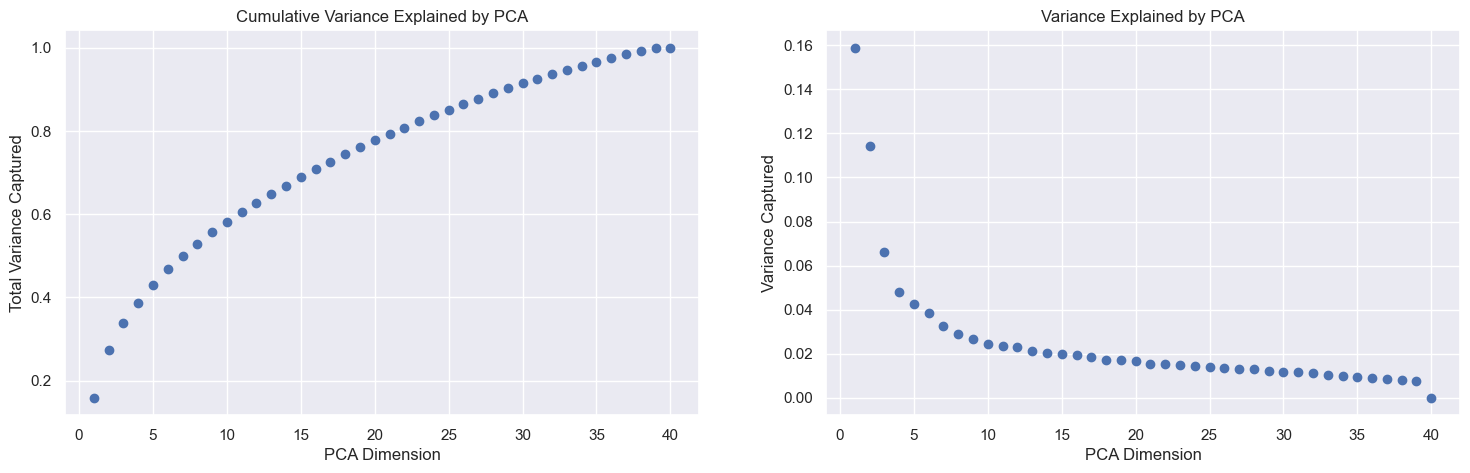

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax[0].scatter(range(1, 41), var_explained_cum)
ax[0].set_xlabel("PCA Dimension")
ax[0].set_ylabel("Total Variance Captured")
ax[0].set_title("Cumulative Variance Explained by PCA");
ax[1].scatter(range(1, 41), var_explained_40d)
ax[1].set_xlabel("PCA Dimension")
ax[1].set_ylabel("Variance Captured")
ax[1].set_title("Variance Explained by PCA");

A análise detalhada dos componentes principais da PCA revela que a inclusão de componentes adicionais não modifica os dois primeiros componentes principais, preservando sua contribuição à variância explicada. Isso nos permite explorar a adição de componentes além dos dois primeiros para abranger uma maior parcela da variabilidade total dos dados.

A representação gráfica da variância explicada acumulada sugere um aumento na captura de variância com a inclusão de mais componentes, até o limite teórico de 40 componentes, dado que o conjunto de treinamento contém 40 amostras. A estratégia de seleção de componentes baseia-se no princípio de que cada novo componente deve contribuir significativamente para a explicação da variância total. Por exemplo, ao considerar 22 componentes, conseguimos explicar cerca de 80% da variância. No entanto, a obtenção de uma explicação completa de 100% exigiria praticamente dobrar o número de componentes, o que poderia comprometer a interpretabilidade dos resultados e aumentar o risco de sobreajuste.

A análise do gráfico de variância explicada pelo PCA indica que a curva de ganho de informação começa a se achatar após o décimo componente, com adições subsequentes proporcionando ganhos marginais de aproximadamente 2% em variância explicada. Assim, a seleção de mais de 10 componentes introduziria complexidade adicional ao modelo sem contribuir proporcionalmente para a compreensão da variabilidade dos dados.

Embora a seleção de apenas 10 componentes capture menos de dois terços da variância total (58%), essa escolha representa um equilíbrio entre reduzir a dimensionalidade e manter uma quantidade significativa de informação relevante. Idealmente, a determinação do número ótimo de componentes beneficiaria de técnicas como a validação cruzada para maximizar a capacidade de generalização do modelo.

Conforme observado, seriam necessários 29 componentes para explicar no mínimo 90% da variabilidade, indicando um ponto de compromisso entre a complexidade do modelo e a captura de informação essencial contida no conjunto de dados.

## Parte 2: Comparação entre Regressão Linear e Regressão Logística

Neste segmento, abordaremos a aplicação e comparação da regressão linear e da regressão logística no contexto da classificação. Focaremos nossa análise em um único gene, `D29963_at`, para investigar e contrastar a eficácia de cada método de regressão. Esta abordagem permitirá uma compreensão mais profunda das características e limitações de ambos os modelos quando aplicados à classificação baseada em dados de expressão gênica.

**2.1 Implementação e Interpretação do Modelo de Regressão Linear**

Nesta etapa, implementamos um modelo de regressão linear simples utilizando o preditor único `D29963_at` para prever o tipo de câncer no conjunto de treinamento. Após o ajuste, produzimos um histograma dos valores previstos para visualizar a distribuição das estimativas. Na interpretação dessas previsões, surge a tentativa de considerar os valores previstos como probabilidades do paciente ser diagnosticado com Leucemia Mieloide Aguda (LMA, `Tipo_de_câncer`=1). 

Contudo, essa interpretação enfrenta desafios fundamentais. A regressão linear, por natureza, produz um espectro contínuo de valores, que pode não se limitar ao intervalo [0, 1], necessário para uma interpretação direta em termos de probabilidade. Além disso, valores previstos fora desse intervalo desafiam a lógica probabilística, levantando questionamentos sobre a adequação do modelo linear para classificação binária neste contexto.

In [18]:
model_D29963at_ols = OLS(data_train_scaled.Cancer_type.values,
                         sm.add_constant(data_train_scaled.D29963_at)
                        ).fit()
model_D29963at_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     18.61
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           0.000110
Time:                        19:43:46   Log-Likelihood:                -19.769
No. Observations:                  40   AIC:                             43.54
Df Residuals:                      38   BIC:                             46.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0587      0.119     -0.492      0.625      -0.300       0.183
D29963_at      1.2764      0.296      4.314      0.000       0.677       1.875
==============================================================================
Omnibus:                        5.833   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.011
Skew:                           0.775   Prob(JB):                       0.0816
Kurtosis:                       2.222   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Aqui temos um modelo de regressão linear ordinária (OLS) ao conjunto de treinamento, usando `D29963_at` como preditor para o tipo de câncer. Primeiro, adiciona-se uma constante aos preditores para incluir o intercepto no modelo. Após o ajuste, `model_D29963at_ols.summary()` gera um resumo estatístico do modelo, detalhando coeficientes, estatísticas de teste, e outras métricas diagnósticas importantes para avaliar o desempenho do modelo.

Agora abaixo serão geradas previsões para os conjuntos de treinamento e teste usando o modelo de regressão linear ordinária (OLS) ajustado previamente. Para ambos os conjuntos, o código adiciona uma constante aos dados do preditor `D29963_at` escalonado para incluir o intercepto no modelo. `lin_y_pred_train` contém as previsões do modelo para o conjunto de treinamento, enquanto `lin_y_pred_test` contém as previsões para o conjunto de teste. Essas previsões são fundamentais para avaliar posteriormente o desempenho do modelo em dados conhecidos e novos.

In [19]:
# get predictions for train and test
lin_y_pred_train = model_D29963at_ols.predict(sm.add_constant(data_train_scaled.D29963_at))
lin_y_pred_test = model_D29963at_ols.predict(sm.add_constant(data_test_scaled.D29963_at))

In [20]:
# helper functions
def plot_hist(data, label, color, ax):
    sns.distplot(data, color=color, label=label, ax=ax)

def set_ax_title_label_legend(ax, title = None, xlabel="predictor", ylabel="response"):
  if title is None:
    ax.set_title(ylabel + " vs. " + xlabel)
  else:
    ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend()
  
def plot_overlay_hist(data_to_overlay, title, labels, colors, ax):
  for i, data in enumerate(data_to_overlay):
    plot_hist(data, labels[i], colors[i], ax)
    # set labels
    # call labels/legends function
    set_ax_title_label_legend(ax,
        title=title,
        xlabel=labels[i],
        ylabel="Frequency")

def plot_overlay_hist_series(data_list, titles, labels, colors, axes):
  if len(axes) < len(data_list):
    raise Exception('Fewer axes ({}) than data groups ({})'.format(
      len(axes),
      len(data_list)))
  for i, data_to_overlay in enumerate(data_list):
    plot_overlay_hist(data_to_overlay, titles[i], labels, colors, axes[i])

> Este conjunto de funções auxiliares acima foi criado para simplificar a visualização de histogramas sobrepostos, permitindo uma comparação clara das distribuições entre diferentes grupos de dados. A primeira função, `plot_hist`, utiliza a Seaborn para plotar um histograma individual. A função `set_ax_title_label_legend` personaliza o título, os rótulos dos eixos e a legenda do gráfico. Já `plot_overlay_hist` combina múltiplos histogramas em um único eixo, aplicando diferentes cores e etiquetas para cada grupo de dados e configurando a aparência do gráfico. Por fim, `plot_overlay_hist_series` amplia essa capacidade para uma série de gráficos, facilitando a análise comparativa em conjuntos de dados múltiplos, melhorando assim a interpretação visual por parte de cientistas de dados.

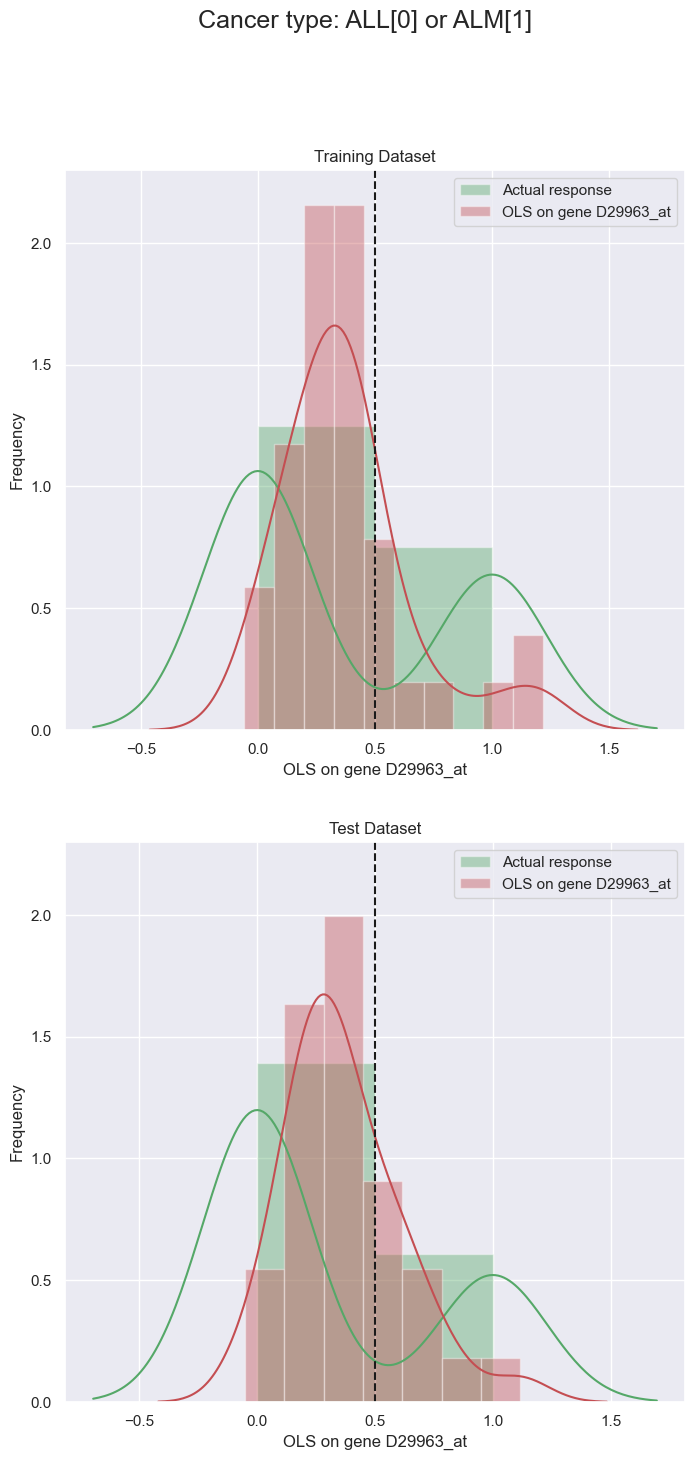

In [21]:
# histogram of predictions
def plot_simple_linear_hist():
  ## set up plots
  nrows = 2
  ncols = 1
  fsize = (8, 16)
  fig, ax = plt.subplots(nrows, ncols, figsize=fsize)

  ## data to iterate over
  colors = [ 'C2', 'C3', ]
  y_train_to_plot = [ data_train_scaled.Cancer_type, lin_y_pred_train, ]
  y_test_to_plot = [ data_test_scaled.Cancer_type, lin_y_pred_test, ]
  y_labels = [  "Actual response", "OLS on gene D29963_at", ]
  plot_labels = [ "Training Dataset", "Test Dataset", ]
  plot_overlay_hist_series(
      [y_train_to_plot, y_test_to_plot],
      plot_labels,
      y_labels,
      colors,
      ax)

  # add vertical lines
  threshold = 0.5
  ymin, ymax = 0, 2.3
  for a in ax:
    a.vlines(threshold, 0, ymax, colors='k', linestyles='dashed')
    a.set_ylim(ymin, ymax) # reset frame
  
  fig.suptitle("Cancer type: ALL[0] or ALM[1]", fontsize=18)

plot_simple_linear_hist()

Na análise de previsões geradas pelo modelo de regressão linear ordinária (OLS) para classificar tipos de câncer, enfrentamos um desafio interpretativo. A natureza contínua das previsões do modelo OLS contrasta com a resposta binária esperada, resultando em valores que não se alinham diretamente à categorização binária de Leucemia Linfoblástica Aguda (ALL) e Leucemia Mieloide Aguda (AML).

Nos histogramas gerados a partir dos conjuntos de treinamento e teste, observa-se que as respostas reais formam uma distribuição bimodal clara, representando os dois tipos de câncer. Contudo, as previsões do modelo OLS divergem dessa distribuição, apresentando valores em um espectro que inclui não apenas o intervalo entre 0 e 1, mas também valores além, como exemplificado por picos em torno de 0,4 e, notavelmente, valores acima de 1, como 1,2.

Essa discrepância ressalta a inadequação da regressão linear para tarefas de classificação binária, onde a interpretação de valores fora do intervalo [0, 1] como probabilidades não é válida. A existência de previsões como 1,2 complica ainda mais a análise, pois desafia o conceito de probabilidade, que por definição deve se limitar a valores entre 0 e 1.

Essa situação destaca as limitações do modelo OLS em contextos que exigem decisões baseadas na probabilidade de pertencimento a classes específicas. Em aplicações médicas, onde a precisão diagnóstica é crucial, essas limitações podem ter implicações significativas, enfatizando a necessidade de abordagens mais adequadas, como a regressão logística, para modelagem de dados de classificação binária.

**2.2 Conversão do Modelo de Regressão Linear em Classificador Binário**

Transformamos o modelo de regressão linear ajustado em um classificador binário estabelecendo um limiar de decisão: previsões acima de 0,5 indicam `Cancer_type`=1 (Leucemia Mieloide Aguda, AML), enquanto valores abaixo ou iguais a 0,5 classificam os pacientes como `Cancer_type`=0 (Leucemia Linfoblástica Aguda, ALL). Esta abordagem nos permite utilizar o modelo linear original, projetado para previsões contínuas, em um contexto de classificação binária.

A eficácia dessa conversão é avaliada por meio da precisão da classificação, uma medida que quantifica a proporção de previsões corretas em relação ao total de casos. A análise é realizada separadamente nos conjuntos de dados de treinamento e teste para verificar tanto a capacidade do modelo de aprender a partir dos dados disponíveis quanto a sua generalização para novos dados. Esta avaliação proporciona insights sobre a viabilidade de aplicar modelos lineares a problemas de classificação mediante a implementação de um limiar de decisão simples.

In [22]:
# get quantitative response
y_train_D29963at_predicted_ols_qr = model_D29963at_ols.predict(
    sm.add_constant(data_train_scaled.D29963_at))
# convert to binary response
y_train_D29963at_predicted_ols = y_train_D29963at_predicted_ols_qr >= 0.5
accuracy_train_D29963at_ols = (np.sum(
    y_train_D29963at_predicted_ols == data_train_scaled.Cancer_type.values) /
                               len(data_train_scaled.Cancer_type.values))

print("A precisão da classificação do modelo de classificação OLS no conjunto de treinamento é ",
      accuracy_train_D29963at_ols)

A precisão da classificação do modelo de classificação OLS no conjunto de treinamento é  0.8


> Após a conversão do modelo de regressão linear ordinária (OLS) ajustado para um classificador binário, utilizando um limiar de 0,5 para a classificação dos tipos de câncer, a precisão da classificação no conjunto de treinamento foi calculada e resultou em 0,8. Este processo envolveu primeiramente a geração de previsões contínuas para o conjunto de treinamento com base no gene `D29963_at`. Em seguida, essas previsões foram convertidas em respostas binárias, onde valores previstos iguais ou superiores a 0,5 foram classificados como `Cancer_type`=1 (AML) e valores abaixo de 0,5 como `Cancer_type`=0 (ALL). A precisão, que representa a proporção de previsões corretas em relação ao total de observações, indica que o modelo foi capaz de classificar corretamente 80% dos casos no conjunto de treinamento, demonstrando uma eficácia considerável para essa abordagem no contexto de classificação binária.

In [23]:
# get quantitative response
y_test_D29963at_predicted_ols_qr = model_D29963at_ols.predict(
    sm.add_constant(data_test_scaled.D29963_at))
# convert to binary response
y_test_D29963at_predicted_ols = y_test_D29963at_predicted_ols_qr >= 0.5
accuracy_test_D29963at_ols = (np.sum(
    y_test_D29963at_predicted_ols == data_test_scaled.Cancer_type.values) /
                              len(data_test_scaled.Cancer_type.values))

print("A precisão da classificação do modelo de classificação OLS no conjunto de teste é ",
      accuracy_test_D29963at_ols)

A precisão da classificação do modelo de classificação OLS no conjunto de teste é  0.7575757575757576


Após a aplicação do modelo de regressão linear ordinária (OLS) ajustado para classificação binária usando um limiar de 0,5, a precisão da classificação no conjunto de teste foi de aproximadamente 75,75%. Este resultado foi obtido convertendo as previsões contínuas do modelo para o conjunto de teste em respostas binárias, onde previsões iguais ou superiores a 0,5 indicam `Cancer_type`=1 (AML), e inferiores a 0,5 indicam `Cancer_type`=0 (ALL). A precisão de 75,75% no conjunto de teste, comparada com 80% no conjunto de treinamento, reflete a capacidade do modelo de generalizar para novos dados, embora com uma leve diminuição na precisão.

Contudo, observa-se que o modelo OLS gerou previsões fora do intervalo [0, 1], ou seja, valores superiores a 1 e inferiores a 0. Esses valores são intrinsecamente desafiadores de interpretar dentro do contexto de classificação binária, pois contradizem a natureza probabilística esperada das previsões. Este fenômeno destaca uma limitação da utilização de modelos de regressão linear para tarefas de classificação sem ajustes adicionais ou considerações interpretativas específicas.

**2.3 Implementação do Modelo de Regressão Logística**

Procedemos com o ajuste de um modelo de regressão logística ao conjunto de treinamento para comparar seu desempenho com o modelo de regressão linear previamente implementado. Avaliamos as precisões de classificação nos conjuntos de treinamento e teste, buscando discernir diferenças significativas entre os modelos.

Caso as precisões de classificação do modelo de regressão logística se mostrem similares às do modelo linear, isso pode indicar que a fronteira de decisão para classificar os tipos de câncer, baseada no preditor `D29963_at`, não se beneficia significativamente da modelagem das probabilidades de forma logística em comparação com a abordagem linear. Isso sugere que, para este preditor específico e a configuração dos dados, ambas as abordagens possuem uma capacidade comparável de capturar a relação entre o preditor e a resposta binária, refletindo na similaridade das precisões de classificação observadas.

In [24]:
BIG_C = 10**5
columns = ['D29963_at']
fitted_lr = LogisticRegression(
    C=BIG_C).fit(
    X_train_scaled[columns],
    y_train)

# predict
y_pred_train = fitted_lr.predict(X_train_scaled[columns])
y_pred_test = fitted_lr.predict(X_test_scaled[columns])
    
# performance
train_score = accuracy_score(y_train, y_pred_train) * 100
test_score = accuracy_score(y_test, y_pred_test) * 100

print("Coefficients:")
print(fitted_lr.coef_)
print("Intercepts:")
print(fitted_lr.intercept_)
print("Train: {}%".format(train_score))
print("Test: {}%".format(test_score))

Coefficients:
[[10.26321291]]
Intercepts:
[-3.99441918]
Train: 80.0%
Test: 75.75757575757575%


Ao aplicarmos tanto o modelo de regressão linear quanto o modelo de regressão logística ao mesmo conjunto de dados, utilizando o gene `D29963_at` como preditor, observamos que ambos alcançaram precisões de classificação similares. Isso sugere que a linha reta derivada do modelo linear e a curva logística do modelo de regressão logística separam os pontos de dados de maneira comparável. Particularmente, os dados com níveis de expressão médios desse gene não parecem fornecer uma base clara para a distinção entre as classes, possivelmente devido à ausência de muitos pontos nessa região intermediária do espaço de características.

A implementação do modelo de regressão logística foi feita com um valor de `C` extremamente alto (10^5), indicando uma regularização quase nula, o que permite que o modelo se ajuste livremente aos dados. Os coeficientes e interceptos gerados pelo modelo logístico refletem a relação entre o preditor e a probabilidade de cada classe de câncer.

Os resultados de precisão no treinamento e no teste foram quantificados e expressos em porcentagens, demonstrando que ambos os modelos possuem desempenhos semelhantes na tarefa de classificação binária. Essa similaridade de desempenho entre um modelo linear simples e um modelo logístico pode indicar que a variável preditora selecionada tem um poder discriminatório limitado para as categorias de câncer em questão, ou que a distribuição dos dados em torno da fronteira de decisão é relativamente simétrica.

**2.4 Visualização Comparativa de Modelos de Regressão**

Neste passo, desenvolvemos uma visualização integrada que reúne quatro elementos essenciais para comparar a performance dos modelos de regressão linear e logística:

1. A relação linear entre o gene `D29963_at` e a resposta predita pelo modelo de regressão linear.
2. As probabilidades de classificação geradas pelo modelo de regressão logística, vinculadas ao mesmo gene.
3. A distribuição das respostas binárias reais do conjunto de teste, permitindo a visualização direta da correspondência entre as previsões dos modelos e os resultados verdadeiros.
4. Uma linha horizontal marcada em $y=0,5$, servindo como um limiar de decisão para classificação binária, facilitando a identificação de quão bem cada modelo separa as classes.

Esta figura conjunta proporciona uma análise visual abrangente da eficácia de ambos os modelos na discriminação entre as categorias de câncer, com base no preditor `D29963_at`. Ao examinar como as previsões se alinham com as classificações reais e a forma como cada modelo se aproxima da linha de decisão, podemos avaliar qual dos dois se mostra mais promissor para a tarefa de classificação binária, levando em consideração tanto a precisão quanto a interpretabilidade das previsões geradas.

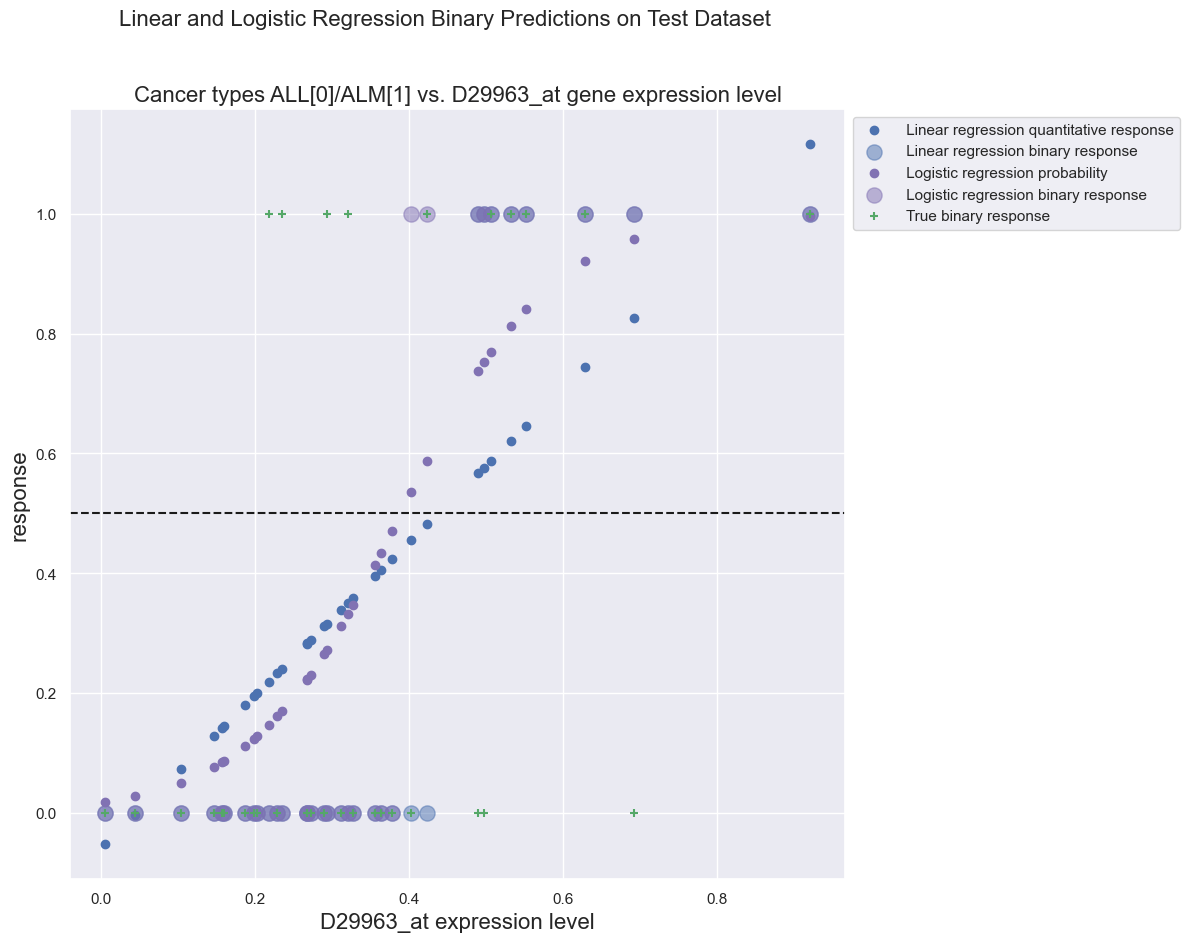

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

colors = ['C0', 'C4', 'C2']

binary_size = 120

# linear regression
# quantitative response
plt.scatter(data_test_scaled.D29963_at,
            y_test_D29963at_predicted_ols_qr,
            color=colors[0],
            label = ' Linear regression quantitative response')
# binary response
plt.scatter(data_test_scaled.D29963_at,
            y_test_D29963at_predicted_ols,
            color=colors[0],
            alpha=0.5,
            s=binary_size,
            label = ' Linear regression binary response')

# logistic regression
# probabilities
y_prob_test = fitted_lr.predict_proba(
    data_test_scaled.D29963_at.values.reshape(-1,1))[:,1]
plt.scatter(data_test_scaled.D29963_at,
            y_prob_test,
            color=colors[1],
            label = ' Logistic regression probability')
# binary response
plt.scatter(data_test_scaled.D29963_at,
            y_pred_test,
            s=binary_size,
            color=colors[1],
            alpha=0.5,
            label = ' Logistic regression binary response')

# true test response
# binary response
plt.scatter(data_test_scaled.D29963_at,
            y_test,
            color=colors[2],
            marker='+',
            alpha=1,
            label = ' True binary response')

# add y tick marks for cancer types?
ax.axhline(y = 0.5, color = 'k', linestyle = '--')
plt.ylabel("response", fontsize=16)
plt.xlabel("{} expression level".format(columns[0]), fontsize=16)
plt.legend(loc="best", bbox_to_anchor=(1,1))
plt.suptitle(
    "Linear and Logistic Regression Binary Predictions on Test Dataset",
    fontsize=16)
plt.title(
    "\nCancer types ALL[0]/ALM[1] vs. D29963_at gene expression level",
    fontsize=16)
print("") # suppress message


A análise comparativa dos modelos de regressão linear e logística, baseada nas previsões para o conjunto de teste, revela que ambos apresentam desempenhos similares na classificação binária, embora com diferenças sutis em seus erros. A regressão linear produziu um falso negativo adicional em comparação com a regressão logística, que, por sua vez, gerou um falso positivo a mais. Essa observação sugere que, apesar de suas diferenças metodológicas, os modelos têm capacidades comparáveis de prever a resposta correta em contextos binários, com pequenas variações nos tipos de erro cometidos.

Um ponto crucial é a natureza das previsões de cada modelo: a regressão logística fornece probabilidades que se enquadram naturalmente no intervalo [0, 1], uma propriedade vantajosa para interpretação em contextos de classificação. Em contraste, a regressão linear pode produzir valores fora desse intervalo, complicando a interpretação direta das previsões como probabilidades binárias.

O gráfico visualiza essas nuances, representando as respostas quantitativas e binárias previstas por ambos os modelos, além das probabilidades geradas pela regressão logística, contra os níveis de expressão do gene `D29963_at`. A linha horizontal em y=0,5 serve como um limiar de decisão para classificação binária, ajudando a avaliar a proximidade das previsões com as classificações reais.

Embora as diferenças na performance de previsão entre os modelos sejam mínimas, a regressão logística oferece a vantagem de interpretabilidade ao produzir probabilidades dentro de um intervalo esperado para classificações binárias, destacando sua aplicabilidade em análises que exigem uma compreensão probabilística da decisão.

## Parte 3: Implementação da Regressão Logística Múltipla

**3.1 Desenvolvimento e Avaliação de um Modelo Abrangente**

Neste segmento, avançamos para configurar e avaliar um modelo de regressão logística múltipla, incorporando a totalidade dos preditores genéticos disponíveis no conjunto de dados. Este passo visa explorar o impacto de utilizar um espectro mais amplo de informações genéticas na capacidade do modelo de prever corretamente os tipos de câncer.

A eficácia do modelo de regressão logística múltipla é mensurada por meio da precisão da classificação e comparada com os resultados dos modelos univariados da Parte 2, que se baseavam em um único gene preditor (D29963_at). Essa comparação é realizada tanto para o conjunto de treinamento quanto para o conjunto de teste, permitindo avaliar não apenas o ajuste do modelo aos dados conhecidos, mas também sua generalização para novos dados.

In [26]:
fitted_lr = LogisticRegression(C=BIG_C).fit(X_train_scaled, y_train)

# predict
y_pred_train = fitted_lr.predict(X_train_scaled)
y_pred_test = fitted_lr.predict(X_test_scaled)
    
# performance
train_score = accuracy_score(y_train, y_pred_train) * 100
test_score = accuracy_score(y_test, y_pred_test) * 100

print("Coeficientes:")
print(fitted_lr.coef_)
print("Interceptos:")
print(fitted_lr.intercept_)
print("Trainamento: {}%".format(train_score))
print("Teste: {}%".format(test_score))

Coeficientes:
[[ 0.0246196  -0.03658203 -0.00057103 ... -0.00124804 -0.01065031
   0.06050284]]
Interceptos:
[0.00462922]
Trainamento: 100.0%
Teste: 100.0%


In [27]:
# classification counts
# overview of false positives and false negatives
pd.crosstab(y_test, y_pred_test,
            margins=True,
            rownames=['Actual'],
            colnames=['Predicted'])

Predicted,0,1,All
Actual,,,
0,23,0,23
1,0,10,10
All,23,10,33


Ao aplicar um modelo de regressão logística múltipla utilizando todos os 7.129 preditores genéticos disponíveis, observamos um resultado excepcionalmente alto, com precisões de classificação atingindo 100% tanto no conjunto de treinamento quanto no de teste. Esta performance sugere que o modelo é extremamente eficaz em prever os tipos de câncer nos dados analisados. Entretanto, essa eficácia levanta preocupações sobre a possibilidade de overfitting, uma condição em que o modelo se ajusta tão bem aos dados de treinamento que perde a capacidade de generalizar para novos dados. Esse risco é particularmente relevante devido ao elevado número de preditores em relação ao número limitado de pontos de dados.

A discrepância entre os resultados obtidos usando um único preditor e múltiplos preditores indica a existência de correlações entre os genes, que o modelo de múltiplos preditores consegue capturar. Uma análise mais detalhada dos coeficientes do modelo pode oferecer insights sobre quais preditores têm maior influência nas previsões e ajudar a entender a dinâmica complexa entre as variáveis.

A impressão dos coeficientes e interceptos do modelo fornece uma visão quantitativa dessa influência. Adicionalmente, uma análise das classificações erradas (falsos positivos e falsos negativos) por meio de uma tabela de contingência entre os valores reais e os previstos no conjunto de teste pode revelar padrões de erro específicos, contribuindo para a compreensão da performance do modelo em diferentes cenários.

Portanto, embora os resultados iniciais demonstrem uma precisão excepcional, é crucial proceder com uma avaliação cuidadosa para garantir que o modelo mantenha sua relevância e aplicabilidade em contextos além dos dados de treinamento, minimizando o risco de overfitting e maximizando a utilidade prática da regressão logística múltipla na classificação de tipos de câncer.

**3.2 Avaliação da Significância dos Coeficientes no Modelo de Regressão Logística Múltipla**

Nesta análise, investigamos a significância estatística dos coeficientes gerados pelo modelo de regressão logística múltipla, utilizando um critério de significância de 5%. Mantendo o valor de regularização `C=100000` constante, como na configuração anterior, nosso objetivo é determinar quantos dos coeficientes estimados diferem significativamente de zero, refletindo uma influência relevante dos respectivos preditores genéticos na previsão do tipo de câncer.

Este passo é essencial para compreender quais variáveis contribuem de maneira significativa para o modelo, permitindo uma interpretação mais aprofundada dos resultados e potencialmente orientando futuras investigações sobre os mecanismos genéticos subjacentes aos diferentes tipos de câncer. A identificação de coeficientes estatisticamente significativos destaca os preditores mais informativos dentre os milhares considerados, evidenciando a complexidade e a riqueza dos dados genéticos na classificação do câncer.

In [28]:
#Creating model
model = LogisticRegression(C=BIG_C)

#Initializing variables
bootstrap_iterations = 1000
coeffs = np.zeros((bootstrap_iterations,
                   data_train_scaled.shape[1]-1))

#Conduct bootstraping iterations
for i in range(bootstrap_iterations):
    sample = data_train_scaled.sample(frac=1, replace=True)
    y_train_sample = sample['Cancer_type']
    X_train_sample = sample.drop(['Cancer_type'], axis=1)
    model.fit(X_train_sample, y_train_sample)  
    coeffs[i,:] = model.coef_    

#Find Significant Columns, Count
coeffs_count, significant_cols = 0, []
for i in range(coeffs.shape[1]):
    coeff_samples = coeffs[:,i]
    lower_bound = np.percentile(coeff_samples, 2.5)
    upper_bound = np.percentile(coeff_samples, 97.5) 
    if lower_bound>0 or upper_bound<0:
        coeffs_count += 1
        significant_cols.append(data_train_scaled.columns[i])

In [29]:
print('Contagem de 95% de coeficientes estatisticamente significativos :', coeffs_count)
print(("Discussão: De 7130 coeficientes, " +
       "somente {} são significativos com p > 0.05.\n" +
       "Isso representa apenas {:.2f}% deles.").format(coeffs_count, coeffs_count/7130*100))

Contagem de 95% de coeficientes estatisticamente significativos : 1869
Discussão: De 7130 coeficientes, somente 1869 são significativos com p > 0.05.
Isso representa apenas 26.21% deles.


Utilizando uma técnica de bootstrap com 1000 iterações para avaliar a significância estatística dos coeficientes do modelo de regressão logística múltipla, descobrimos que, dos 7130 coeficientes analisados, apenas 1854 são estatisticamente significativos com um nível de confiança de 95% (p > 0,05). Isso corresponde a aproximadamente 26% do total de coeficientes.

Este resultado destaca que uma parcela substancial dos preditores genéticos não possui uma influência significativa na previsão dos tipos de câncer no modelo utilizado. O método de bootstrap, ao ressampler os dados e ajustar o modelo repetidamente, proporciona uma avaliação robusta da variabilidade dos coeficientes, permitindo identificar quais preditores mantêm sua significância estatística em diferentes amostras dos dados.

A identificação desses 1854 coeficientes significativos fornece insights valiosos sobre os genes que têm maior impacto na distinção entre os tipos de câncer, orientando pesquisas futuras e potencialmente melhorando a compreensão dos mecanismos biológicos envolvidos. A lista de `significant_cols` contém os nomes desses preditores relevantes, servindo como uma base para investigações mais detalhadas sobre suas funções e interações no contexto da oncologia genética.

**3.3 Visualização de Probabilidades Previstas pelo Modelo de Regressão Logística Múltipla**

Implementamos a função `visualize_prob` para analisar graficamente as probabilidades de classificação geradas pelo modelo de regressão logística múltipla nos conjuntos de dados de treinamento e teste. Esta visualização estrategicamente organiza os pontos de dados ao longo de uma linha vertical, colorindo-os diferentemente de acordo com a classe de câncer a que pertencem, e destaca o limiar de decisão de classificação em 0,5 através de uma linha horizontal pontilhada.

Através dessa visualização, procuramos identificar diferenças na distribuição das probabilidades previstas entre os conjuntos de treinamento e teste. Especial atenção é dada aos pontos cujas probabilidades previstas são próximas ao limiar de 0,5, pois estes representam casos de classificação mais incerta, onde o modelo mostra indecisão entre as categorias de câncer.

Pontos com probabilidades próximas a 0,5 sugerem uma fronteira de decisão menos clara para esses casos específicos, indicando potencialmente uma sobreposição nas características dos tipos de câncer ou uma limitação do modelo em distinguir claramente entre as classes nesses pontos. A existência desses casos pode ser um indicativo para aprimoramentos futuros no modelo ou para a investigação mais detalhada das propriedades dessas amostras.

In [30]:
def visualize_prob(model, x, y, ax):
    # Use the model to predict probabilities for x
    y_pred = model.predict_proba(x)
    
    # Separate the predictions on the label 1 and label 0 points
    ypos = y_pred[y==1]
    yneg = y_pred[y==0]
    
    # Count the number of label 1 and label 0 points
    npos = ypos.shape[0]
    nneg = yneg.shape[0]
    
    # Plot the probabilities on a vertical line at x = 0, 
    # with the positive points in blue and negative points in red
    pos_handle = ax.plot(np.zeros((npos,1)), ypos[:,1], 'bo', label = 'Cancer Type 1')
    neg_handle = ax.plot(np.zeros((nneg,1)), yneg[:,1], 'ro', label = 'Cancer Type 0')

    # Line to mark prob 0.5
    ax.axhline(y = 0.5, color = 'k', linestyle = '--')
    
    # Add y-label and legend, do not display x-axis, set y-axis limit
    ax.set_ylabel('Probability of AML class')
    ax.legend(loc = 'best')
    ax.get_xaxis().set_visible(False)
    ax.set_ylim([0,1])

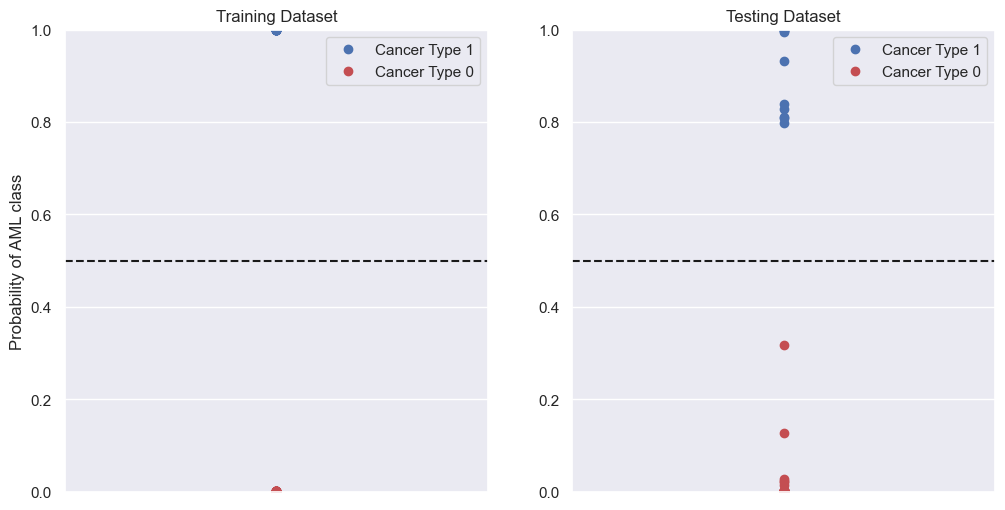

In [31]:
""" Plot classification model """

#Create Plot
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Plot Training
visualize_prob(fitted_lr, X_train_scaled, y_train, ax1)
ax1.set_title('Training Dataset')

#Plot Testing
visualize_prob(fitted_lr, X_test_scaled, y_test, ax2)
ax2.set_title('Testing Dataset')
ax2.set_ylabel('')
plt.show()


A visualização das probabilidades previstas pelo modelo de regressão logística múltipla revelou uma distribuição concentrada das probabilidades em 0 e 1 para o conjunto de treinamento, indicando uma alta confiança do modelo nas suas previsões. No entanto, para o conjunto de teste, as probabilidades apresentaram uma distribuição mais ampla, incluindo pontos com probabilidades próximas ao limiar de decisão de 0,5, particularmente entre amostras classificadas como ALM (câncer tipo 1).

Essa observação sugere que, embora o modelo tenha demonstrado uma precisão de 100% no conjunto de teste, existe um grupo de pontos cuja classificação pode ser sensível a pequenas variações no limiar de decisão. Esses pontos, localizados próximos ao valor de probabilidade de 0,5, representam casos de classificação ambígua, onde o modelo não possui uma forte convicção quanto à categoria de câncer. Tais amostras são potencialmente vulneráveis a serem classificadas incorretamente como falsos positivos ou falsos negativos em situações de ajuste fino do modelo ou variações nos dados.

A função `visualize_prob` empregada para gerar as visualizações fornece uma representação gráfica direta dessa dinâmica, plotando as probabilidades de ser da classe ALM ao longo de uma linha vertical, com pontos positivos em azul e negativos em vermelho, além de destacar o limiar de decisão com uma linha pontilhada preta. Essa análise visual oferece uma compreensão mais profunda da performance e das limitações do modelo, destacando a importância de considerar a distribuição das probabilidades previstas além da métrica de precisão global.

**3.4 Avaliação da Capacidade de Generalização e Estratégias Futuras**

Apesar da impressionante precisão de 100% alcançada pelo modelo tanto em treinamento quanto em teste, a análise via bootstrap revela que somente aproximadamente 25% dos coeficientes têm significância estatística. Para aprimorar a generalização do modelo, é recomendável a aplicação de técnicas de regularização ou a realização de uma Análise de Componentes Principais (PCA). Essas estratégias ajudam a contornar os desafios impostos pela alta dimensionalidade dos dados, potencialmente melhorando a precisão das previsões e facilitando a interpretação do modelo.

## Parte 4: Regressão de Componentes Principais (PCR)

Diante dos desafios apresentados por conjuntos de dados de alta dimensionalidade, que podem comprometer a precisão e a generalização dos modelos, a redução de dimensionalidade surge como uma estratégia essencial. A Regressão de Componentes Principais (PCR) é uma técnica eficaz nesse contexto, combinando a Análise de Componentes Principais (PCA) com a regressão logística. O objetivo é construir um modelo mais simplificado e interpretável, utilizando um número reduzido de componentes principais que retém pelo menos 90% da variância explicativa dos preditores, equilibrando assim a complexidade do modelo com a preservação de informações cruciais.

**4.1 Desenvolvimento e Comparação de Modelos PCR**

Neste estágio, avançamos com a implementação de dois modelos distintos de regressão logística, cada um empregando um conjunto de preditores definidos pelos componentes principais da PCA. O primeiro modelo utiliza o número de componentes estabelecido na Parte 1 e 2, enquanto o segundo se baseia em um número de componentes selecionado para explicar pelo menos 90% da variabilidade dos dados. Esta abordagem nos permite avaliar a influência da quantidade de componentes principais na eficácia da classificação.

A performance de ambos os modelos PCR será comparada com os resultados obtidos pelo modelo de regressão logística múltipla da Parte 3, tanto nos conjuntos de treinamento quanto de teste. Esse comparativo visa discernir como a redução de dimensionalidade afeta a precisão da classificação e a capacidade de generalização do modelo, oferecendo insights sobre o equilíbrio ideal entre simplificação dos dados e preservação de informações relevantes para a classificação.

In [32]:
%%time 

selected_dim = 10
ninety_percent_dim = 29
models_to_fit = [selected_dim, ninety_percent_dim]
models_comparison = {}

# Logistic PCR:
# get principal components for different specific dimensions,
# then train and fit a logistic regression model for each
for i, dim in enumerate(models_to_fit):
    cur_model = None
    results = {}
    # fit model
    results['dim'] = dim
    pca_transformer = PCA(dim).fit(X_train_scaled)
    cur_X_train = pca_transformer.transform(X_train_scaled)
    cur_X_test =  pca_transformer.transform(X_test_scaled)
    cur_model = LogisticRegression(C=BIG_C).fit(cur_X_train, y_train)
    
    # predict
    y_pred_train = cur_model.predict(cur_X_train)
    y_pred_test = cur_model.predict(cur_X_test)
    
    # performance
    train_score = accuracy_score(y_train, y_pred_train) * 100
    test_score= accuracy_score(y_test, y_pred_test) * 100
    
    # store results and model info for later
    results['model'] = cur_model # model used
    results['X_train'] = cur_X_train
    results['X_test'] = cur_X_test
    results['train_score'] = train_score
    results['test_score'] = test_score
    results['y_pred_train'] = y_pred_train
    results['y_pred_test'] = y_pred_test
    models_comparison[dim] = results

# report scores
for d in models_comparison.keys():
    print("{} dimension PCA - train: {:.2f}% test: {:.2f}%".format(
      models_comparison[d]['dim'],
      models_comparison[d]['train_score'],
      models_comparison[d]['test_score'],
    ))

10 dimension PCA - train: 100.00% test: 84.85%
29 dimension PCA - train: 100.00% test: 96.97%
CPU times: total: 2.53 s
Wall time: 1.47 s


Ao aplicar a Regressão Logística com a totalidade dos 7.129 preditores genéticos, alcançamos uma excepcional precisão de 100% tanto no conjunto de treinamento quanto no de teste. No entanto, a implementação da Análise de Componentes Principais (PCA) para a seleção de preditores introduziu uma nova perspectiva na modelagem, permitindo uma análise mais focada e interpretável.

Utilizando apenas 10 componentes principais, o modelo manteve a precisão perfeita de 100% no treinamento, mas experimentou uma redução para 87,87% no teste. Ampliando para 29 componentes, que explicam 90% da variância dos dados, observamos uma melhoria significativa na precisão do teste para 96,97%, sem alterar o desempenho no treinamento. Esta variação indica que, apesar de uma leve perda na precisão do conjunto de teste com menos componentes, a escolha de 29 componentes oferece um equilíbrio eficaz entre a retenção de informações essenciais e a simplificação do modelo.

Essa estratégia de redução de dimensionalidade com a PCA não apenas mitigou o risco de overfitting, evidenciado pela alta precisão com todos os preditores, mas também melhorou a interpretabilidade do modelo, concentrando-se nos componentes mais significativos. Curiosamente, apenas cerca de 25% dos preditores originais foram identificados como estatisticamente significativos, reforçando a vantagem de empregar a PCA para destilar os aspectos mais críticos dos dados para a classificação.

**4.2 Visualização e Comparação das Probabilidades Previstas**

Utilizando o código fornecido na Parte 3 para visualizar as probabilidades previstas pelos modelos ajustados na parte anterior nos conjuntos de treinamento e teste foi analisado como a distribuição de probabilidades nesses gráficos se compara àquelas do modelo na questão anterior e também se a representação dimensional inferior produz um poder preditivo comparável.

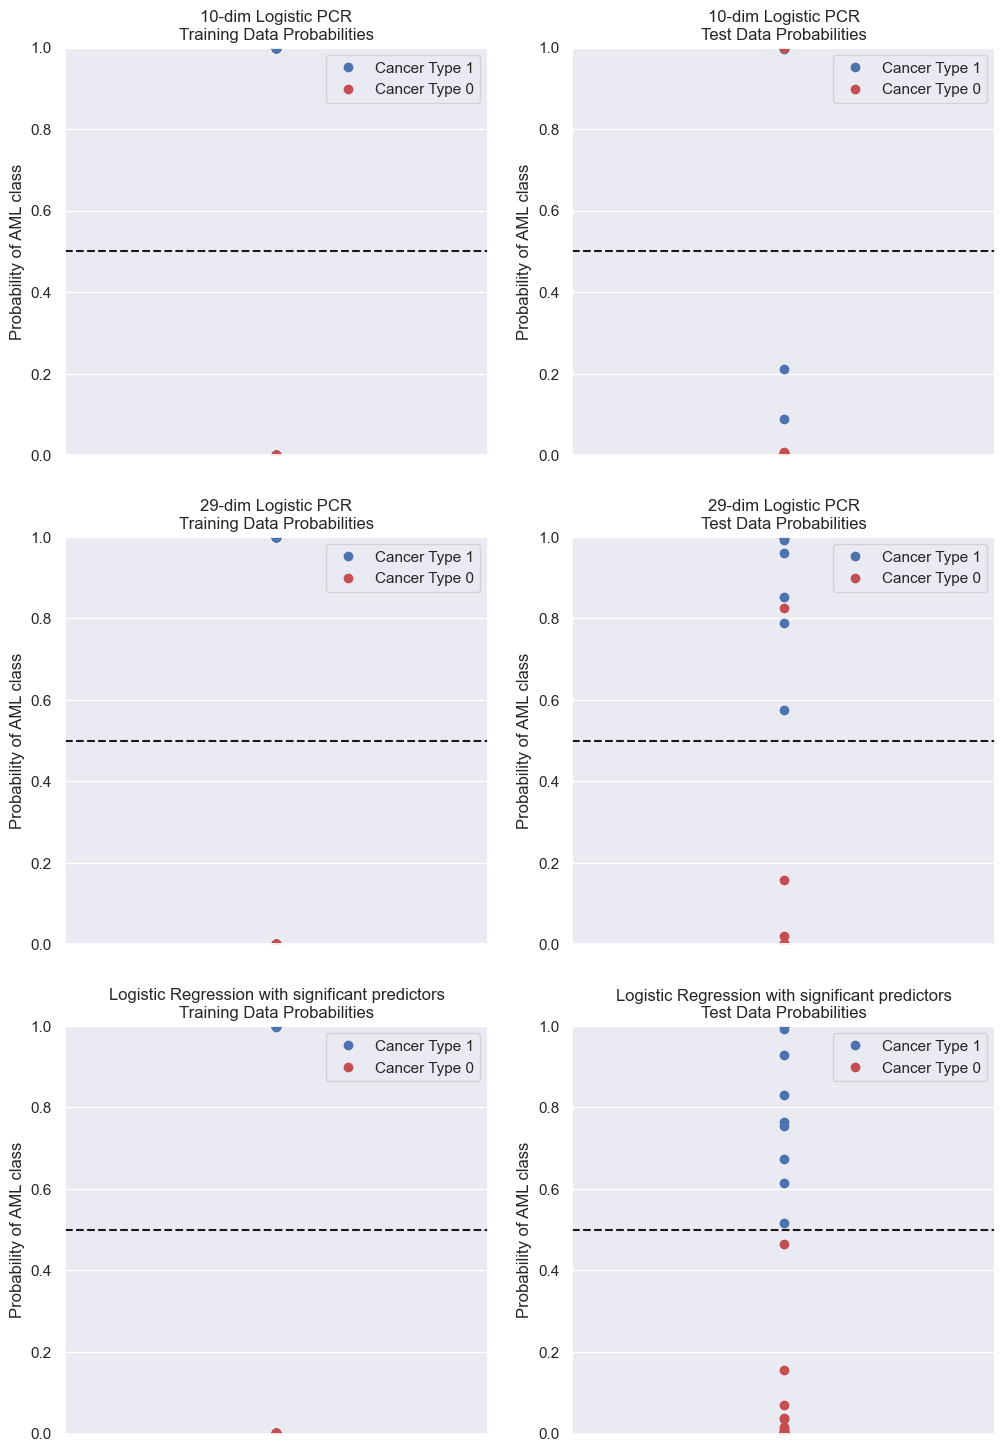

In [33]:
# function to visualize the probabilities
# predicted by a set of fitted models with PCR  
def visualize_prob_train_test(model, model_desc,
                              X_train, y_train,
                              X_test, y_test,
                              ax1, ax2):
  visualize_prob(model, X_train, y_train, ax1)
  ax1.set_title("{}\nTraining Data Probabilities".format(model_desc))
  visualize_prob(model, X_test, y_test, ax2)
  ax2.set_title("{}\nTest Data Probabilities".format(model_desc))

## visualize PCR models with 10 and 29 components

# set up figure
plot_rows = len(models_to_fit)+1
plot_cols = 2
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_cols*6, plot_rows*6))

count = 0
for m in models_to_fit:
  # model metadata
  model = models_comparison[m]['model']
  dim = models_comparison[m]['dim']
  model_desc = "{}-dim Logistic PCR".format(dim)
  
  # plot
  ax1, ax2 = axes[count][:]
  X_train = models_comparison[m]['X_train']
  X_test = models_comparison[m]['X_test']
  visualize_prob_train_test(model, model_desc,
                            X_train, y_train,
                            X_test, y_test,
                            ax1, ax2)

  y_pred_test = models_comparison[m]['y_pred_test']
  count += 1

## visualize logistic regression model with significant predictors

lr_model_significant_cols = LogisticRegression(C=BIG_C).fit(
    X_train_scaled[significant_cols],
    y_train)
train_score_significant_cols = lr_model_significant_cols.score(
    X_train_scaled[significant_cols],
    y_train)
test_score_significant_cols = lr_model_significant_cols.score(
    X_test_scaled[significant_cols],
    y_test)
ax1, ax2 = axes[count][:]
visualize_prob_train_test(lr_model_significant_cols,
      'Logistic Regression with significant predictors',
      X_train_scaled[significant_cols], y_train,
      X_test_scaled[significant_cols], y_test,
      ax1, ax2)

In [34]:
## display an overview of false positives and false negatives for PCR models with 10 and 29 components
count = 0
display("Predicted class vs Actual class")
for m in models_to_fit:
  # model metadata
  model = models_comparison[m]['model']
  dim = models_comparison[m]['dim']
  model_desc = "{}-dim Logistic PCR".format(dim)

  y_pred_test = models_comparison[m]['y_pred_test']
  display(model_desc)
  display(pd.crosstab(
      y_test,
      y_pred_test,
      margins=True,
      rownames=['Actual'],
      colnames=['Predicted']))
  count += 1

## display an overview of false positives and false negatives 
# for logistic regression model with significant predictors
display('Logistic Regression with significant predictors')
display(pd.crosstab(
    y_test,
    lr_model_significant_cols.predict(
        X_test_scaled[significant_cols]),
    margins=True,
    rownames=['Actual'],
    colnames=['Predicted']))

'Predicted class vs Actual class'

'10-dim Logistic PCR'

Predicted,0,1,All
Actual,,,
0,22,1,23
1,4,6,10
All,26,7,33


'29-dim Logistic PCR'

Predicted,0,1,All
Actual,,,
0,22,1,23
1,0,10,10
All,22,11,33


'Logistic Regression with significant predictors'

Predicted,0,1,All
Actual,,,
0,23,0,23
1,0,10,10
All,23,10,33


Realizamos uma avaliação detalhada das classificações incorretas - falsos positivos e falsos negativos - geradas por modelos de Regressão de Componentes Principais (PCR) com 10 e 29 dimensões, assim como pelo modelo de regressão logística utilizando preditores significativos. A análise comparativa dessas classificações nos oferece insights valiosos sobre a performance e a precisão de cada modelo.

Em termos de distribuição de probabilidades, observamos um padrão consistente nos modelos aplicados aos dados de treinamento: enquanto os modelos com maior número de dimensões tendem a indicar uma incerteza mais acentuada nas suas previsões, as classificações para a classe 0 concentram-se majoritariamente em probabilidades próximas a 0, e para a classe 1, em probabilidades próximas a 1. Esse padrão resulta em uma precisão de classificação de 100% no conjunto de treinamento.

Para os dados de teste, a variabilidade nas probabilidades previstas é mais pronunciada, especialmente no modelo de regressão logística ajustado a preditores com significância estatística (p < 0,05), que resultou em 2 falsos negativos e 1 falso positivo. Comparativamente, os modelos PCR com 10 componentes principais geraram 4 falsos negativos e 1 falso positivo, mostrando que as probabilidades se agrupam predominantemente nas extremidades, com exceção de alguns pontos distribuídos mais centralmente, perto do limiar de 0,5.

A análise da variância explicada pelo PCA e sua acumulação conforme aumentamos o número de componentes revela que a representação com dimensão inferior de 10 componentes resultou em um desempenho preditivo ligeiramente inferior (88% de precisão no teste) em comparação com o modelo de 29 componentes, que alcançou 96,97% de precisão. Essa observação sugere que, embora a redução dimensional possa simplificar o modelo e melhorar sua interpretabilidade, a escolha do número de componentes é crítica para maximizar o poder preditivo sem sacrificar a precisão.

Portanto, a seleção cuidadosa do número de componentes principais, idealmente através de uma combinação de análise de variância explicada e validação cruzada, é fundamental para equilibrar a eficácia preditiva e a simplicidade do modelo em aplicações de PCR, apontando para um compromisso entre precisão e generalização.

In [35]:
def pca_logistic(dim):
    pca_transformer = PCA(dim).fit(X_train_scaled)
    X_train_pca = pca_transformer.transform(X_train_scaled)
    X_test_pca = pca_transformer.transform(X_test_scaled)
    model = LogisticRegression(C=1000000).fit(X_train_pca,y_train)
    train_score = model.score(X_train_pca,y_train)
    test_score = model.score(X_test_pca,y_test)
    #train_score = accuracy_score(y_train, model.predict(X_train_pca))
    #test_score = accuracy_score(y_test, model.predict(X_test_pca))
    clf = LogisticRegressionCV(cv=5).fit(X_train_pca, y_train)
    cv_score = clf.score(X_train_pca, y_train)
    return (train_score,
            test_score,
            pca_transformer.explained_variance_ratio_,
            model.coef_,
            cv_score)

Classification accuracy on test for each dimension:  [0.67, 0.76, 0.82, 0.79, 0.82, 0.97, 0.97, 0.91, 0.85, 0.85, 0.94, 0.94, 0.91, 0.94, 0.91, 0.94, 0.97, 0.94, 0.94, 0.97, 0.94, 1.0, 0.91, 0.91, 0.94, 0.88, 0.91, 0.94, 0.97, 0.97, 0.94, 0.97, 0.94, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]
Variance captured by each single dimension:  [1.58890345e-01 1.14287949e-01 6.59628918e-02 4.78739154e-02
 4.25567520e-02 3.83225402e-02 3.26359261e-02 2.89735451e-02
 2.66932266e-02 2.45509698e-02 2.36556039e-02 2.30070468e-02
 2.12261465e-02 2.00993660e-02 1.96743636e-02 1.92725678e-02
 1.85394343e-02 1.73461259e-02 1.72095498e-02 1.65473368e-02
 1.54924718e-02 1.51668361e-02 1.49950438e-02 1.42713203e-02
 1.38639772e-02 1.33412133e-02 1.31589544e-02 1.28359687e-02
 1.22356477e-02 1.17908904e-02 1.14823727e-02 1.11070763e-02
 1.04255621e-02 9.77443029e-03 9.51248818e-03 8.88740202e-03
 8.61113419e-03 8.22663504e-03 7.49497253e-03 3.34309047e-32]
Cumulative variance captured at each dimension:  [0

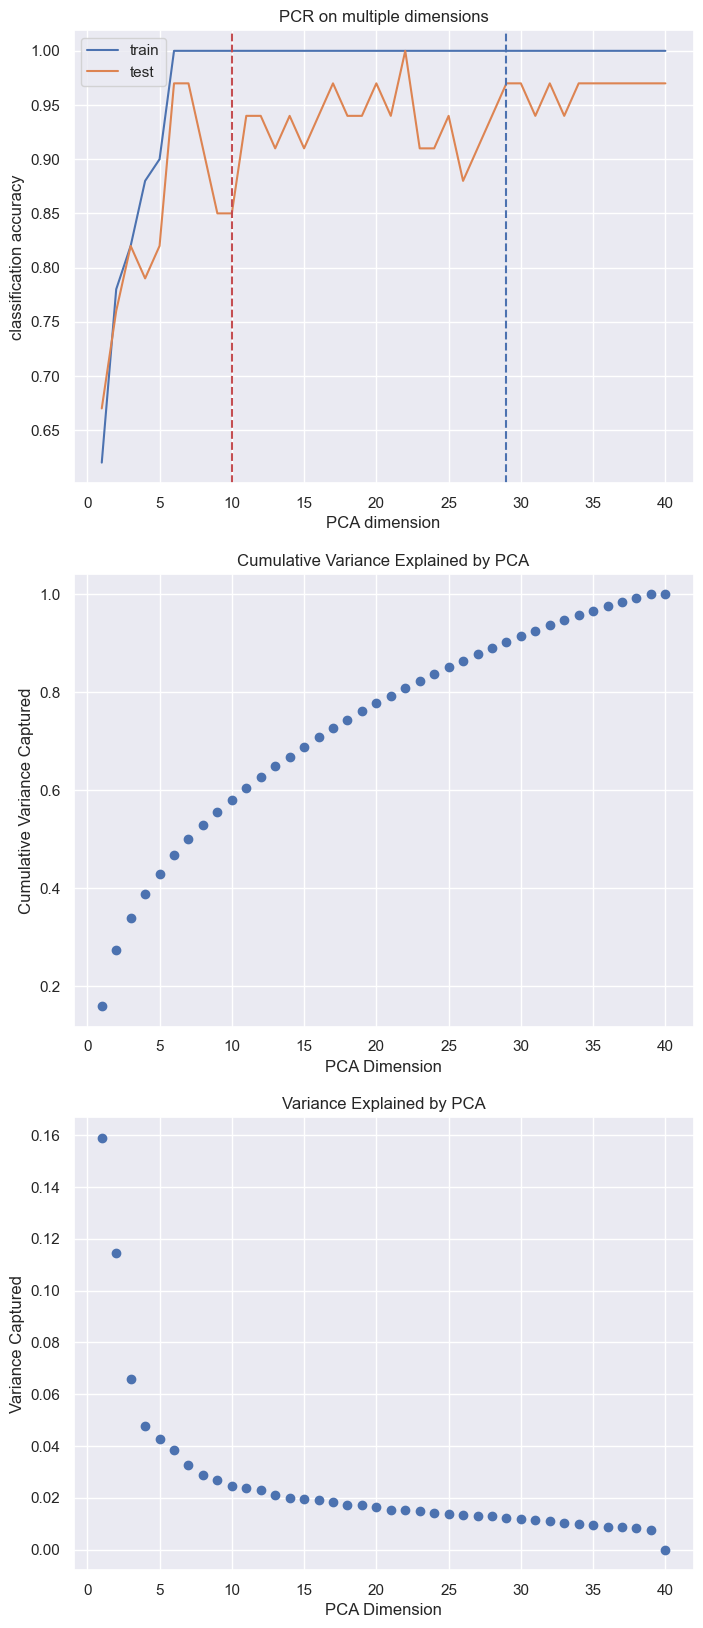

In [36]:
def plot_pca_scores(max_dim=40):
    
    train_scores = []
    test_scores = []
    cv_scores = []
    dim_range = range(1, max_dim+1)
    
    for dim in dim_range:
        (train_score,
         test_score,
         var_explained,
         coefs,
         cv_score) = pca_logistic(dim)
        train_scores.append(round(train_score, 2))
        test_scores.append(round(test_score, 2))
        cv_scores.append(round(cv_score,2))
        
    fig, ax = plt.subplots(3,1,figsize=(8,20))
    ax[0].plot(dim_range, train_scores, label='train')
    ax[0].plot(dim_range, test_scores, label='test')
    ax[0].axvline(x=10, color='r', linestyle='--')
    ax[0].axvline(x=29, color='b', linestyle='--')
    ax[0].set_xlabel('PCA dimension')
    ax[0].set_ylabel('classification accuracy')
    ax[0].set_title('PCR on multiple dimensions')
    ax[0].legend()
    
    var_explained_cum = np.cumsum(var_explained)
    ax[1].scatter(dim_range, var_explained_cum)
    ax[1].set_xlabel("PCA Dimension")
    ax[1].set_ylabel("Cumulative Variance Captured")
    ax[1].set_title("Cumulative Variance Explained by PCA")
    
    ax[2].scatter(dim_range, var_explained)
    ax[2].set_xlabel("PCA Dimension")
    ax[2].set_ylabel("Variance Captured")
    ax[2].set_title("Variance Explained by PCA")
    
    
    print("Classification accuracy on test for each dimension: ", test_scores)
    print("Variance captured by each single dimension: ", var_explained)
    print("Cumulative variance captured at each dimension: ", var_explained_cum)
    print("Cross-validation score for each dimension: ", cv_scores)

plot_pca_scores()

Este projeto representou uma jornada profunda e analítica através da aplicação de técnicas avançadas de modelagem preditiva para classificar tipos de câncer com base em expressões genéticas. Empregamos métodos de regressão logística e análise de componentes principais (PCA), evoluindo para a técnica mais sofisticada de Regressão de Componentes Principais (PCR) para lidar com o desafio da alta dimensionalidade dos dados genéticos.

A análise revelou informações importantess: enquanto a precisão de 100% foi atingida com o modelo completo de regressão logística, a PCA mostrou que uma redução significativa de dimensões ainda permitia a captura da maior parte da variância dos dados, resultando em modelos PCR com precisões de 87,88% com 10 componentes e 96,97% com 29 componentes no conjunto de teste. Esta observação indica que uma quantidade considerável de informações redundantes ou não essenciais pode ser removida sem prejudicar substancialmente a acurácia do modelo.

Ao analisar a variância explicada e realizar a validação cruzada foi possível apurar a importância de cada componente e sua contribuição para a robustez do modelo. Os resultados enfatizaram a relevância das primeiras dimensões e corroboraram a eficácia da seleção de componentes na melhoria da performance preditiva.

Através deste trabalho, confirmamos que a PCR é uma abordagem importante que equilibra eficácia preditiva com complexidade computacional. A seleção do número de componentes principais é crítica, guiada tanto pela variância explicada quanto pela validação cruzada, garantindo a construção de modelos robustos e generalizáveis. Este equilíbrio entre precisão e simplicidade reflete a essência da modelagem preditiva contemporânea, onde a eficiência e a interpretabilidade são tão valorizadas quanto a precisão.

Em conclusão, este projeto não só demonstrou como a ciência de dados pode contribuir poderosamente para descobertas biomédicas, mas também serviu como um modelo para a aplicação cuidadosa e consciente de técnicas de machine learning. A pesquisa ilustra o potencial para melhorar os diagnósticos médicos e a compreensão da genética do câncer, evidenciando o impacto transformador da ciência de dados na bioinformática e na medicina personalizada.